
## Capstone Project - The Battle of Neighbourhoods

### Data Solution

<br>
Chicago City has maintained multiple datasets of different topics. It will be beneficial source of data to do further analysis and  find out most visited places (Foursquare likes or comments) and for Community to find residence or living getting venue data (Foursquare)  and analyze crime data (last 5 years) per community to check which community area is safer.
<br> <br>

Explore Chicago city to help residents or tourist know about below important data/information. <br>
Data requirement: <br>
(1) Chicago Community overview (Cook County).  <br>
(2) Top 5 attractions in LOOP / downtown area for Tourist.  <br>
(3) Top 10 venues for residents per community area.  <br>
(4) Rank Chicago community areas for safe living based on Crime data. <br>

## Part 1 : Chicago Community Overview 

The City of Chicago covers an  area of 60,000 hectares and sits 176 meters (578 feet) above sea level on the southwestern shore of Lake Michigan. At 190 km wide and 495 km long, its the 5th largest body of fresh water in the world. Chicago's extensive parklands, including 3,000 hectares of city parks attract an estimated 86 million visitors annually.

As a multicultural city that thrives on the harmony and diversity of its neighborhoods, Chicago today embodies the values of America's heartland-integrity, hard work and community and reflects the ideals in the social fabric of  its <b> 77 distinct neighborhoods </b>.

Chicago is recognized across the United States as a very passionate sports town. Chicago is a leader in reforming public schools, enhancing public safety and security initiatives, providing affordable housing in attractive and economically sound communities, ensuring accessibility for all and fostering, social, economic and environmental sustainability.

In [88]:
import requests
import lxml
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
source = requests.get('https://en.wikipedia.org/wiki/Community_areas_in_Chicago').text
soup = BeautifulSoup(source,'lxml') # parser lxml

In [3]:
# get the table rows
trow = soup.find('table', class_='wikitable')
trow_cols = trow.tr.text.split("\n") # list
trow_cols.remove('') # remove blank element from list
trow_cols.remove('') # remove blank element from list
trow_cols

['Number', 'Community area', 'Neighborhoods']

In [4]:
# fist clear the list
collect_areas = list()

tables = soup.findAll('table',{'class':'wikitable'})
for table in tables:
    table_rows = table.find_all('tr')
    for tr in table_rows:
        td = tr.find_all('td')
        row = [i.text for i in td]
        print(row)
        collect_areas.append(row)
        

[]
['08\n', 'Near North Side\n', '\nCabrini–Green\nThe Gold Coast\nGoose Island\nMagnificent Mile\nOld Town\nRiver North\nRiver West\nStreeterville\n']
['32\n', 'Loop\n', '\nLoop\nNew Eastside\nSouth Loop\nWest Loop Gate\n']
['33\n', 'Near South Side\n', "\nDearborn Park\nPrinter's Row\nSouth Loop\nPrairie Avenue Historic District\n"]
[]
['05\n', 'North Center\n', '\nHorner Park\nRoscoe Village\n']
['06\n', 'Lake View\n', '\nBoystown\nLake View East\nGraceland West\nSouth East Ravenswood\nWrigleyville\n']
['07\n', 'Lincoln Park\n', '\nOld Town Triangle\nPark West\nRanch Triangle\nSheffield Neighbors\nWrightwood Neighbors\n']
['21\n', 'Avondale\n', "\nBelmont Gardens\nChicago's Polish Village\nKosciuszko Park\n"]
['22\n', 'Logan Square\n', '\nBelmont Gardens\nBucktown\nKosciuszko Park\nPalmer Square\n']
[]
['01\n', 'Rogers Park\n', '\nEast Rogers Park\n']
['02\n', 'West Ridge\n', '\nArcadia Terrace\nPeterson Park\nWest Rogers Park\n']
['03\n', 'Uptown\n', '\nBuena Park\nArgyle Street\nM

In [5]:
df_chi = pd.DataFrame(collect_areas, columns=['Number', 'Community area', 'Neighborhoods'])
df_chi.dropna(axis=0, inplace=True)
df_chi.head()

,Number,Community area,Neighborhoods
1,08\n,Near North Side\n,\nCabrini–Green\nThe Gold Coast\nGoose Island\...
2,32\n,Loop\n,\nLoop\nNew Eastside\nSouth Loop\nWest Loop Ga...
3,33\n,Near South Side\n,\nDearborn Park\nPrinter's Row\nSouth Loop\nPr...
5,05\n,North Center\n,\nHorner Park\nRoscoe Village\n
6,06\n,Lake View\n,\nBoystown\nLake View East\nGraceland West\nSo...


In [6]:
df_chi['Number'] = df_chi['Number'].str.replace("\n", "")
df_chi['Community area'] = df_chi['Community area'].str.replace("\n", "")
df_chi['Neighborhoods'] = df_chi['Neighborhoods'].str.replace("\n", ";").str[1:]
df_chi = df_chi.astype(str)
df_chi.head()

,Number,Community area,Neighborhoods
1,08,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...
5,05,North Center,Horner Park;Roscoe Village;
6,06,Lake View,Boystown;Lake View East;Graceland West;South E...


In [7]:
df_chi['Number'] = df_chi['Number'].astype(int)
df_chi.head()

,Number,Community area,Neighborhoods
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...
5,5,North Center,Horner Park;Roscoe Village;
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...


In [8]:
df_chi.shape

(77, 3)

### Get Latitude and Longitude for Chicago Community Area..

In [9]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_1b66257f0c58427797a4f45e8207c431 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='mnXZ3Stovzpo1TP4cmgbAnquFPn-biSiXc4I6PLjIjEK',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_1b66257f0c58427797a4f45e8207c431.get_object(Bucket='capstoneprojectchicagooverview-donotdelete-pr-h5zuqhbtjxdm4x',Key='Chicago_Community_Area_Lat_Long.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_cor = pd.read_csv(body)
df_cor.head()


,Number,Community Area,Latitude,Longitude
0,8,Near North Side,41.9039,87.6315
1,32,Loop,41.8786,87.6251
2,33,Near South Side,41.8608,87.6257
3,5,North Center,41.9467,87.6883
4,6,Lake View,41.9398,87.6589


In [10]:
# Join Chicago Neighborhood data with Chicago Community Cordinates
df_new = []
df_new = df_chi.join(df_cor.set_index('Number'), on='Number')
chi_data = df_new[['Number', 'Community area', 'Neighborhoods', 'Latitude', 'Longitude']]
chi_data['Longitude']= chi_data['Longitude'] * -1
chi_data.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Number,Community area,Neighborhoods,Latitude,Longitude
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589


In [11]:
!pip install geopy

In [12]:
!pip install folium

     |████████████████████████████████| 92kB 14.4MB/s eta 0:00:01


In [13]:
import json 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [14]:
address = 'Chicago, USA'

geolocator = Nominatim(user_agent="chi_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago City are 41.8755616, -87.6244212.


In [15]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [16]:
# create map of Chicago using latitude and longitude values
map_chicago = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, Community, Neighborhood in zip(chi_data['Latitude'], chi_data['Longitude'], chi_data['Community area'], chi_data['Neighborhoods']):
    label = '{}'.format(Community)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=1,
        parse_html=False).add_to(map_chicago)    
map_chicago

### Get Foursqure credentials

In [17]:
CLIENT_ID = 'PQ1TIS30AV0NJ3CKCODYXOEL03AD4AVD5ECQ0MNPJYKAHM4Q' # your Foursquare ID
CLIENT_SECRET = '5HHHSC2KQLSO2VLCF5Q34KWOHMLKXSCO3JY52F1JZYYR2NZE' # your Foursquare Secret
VERSION = '20191010' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: PQ1TIS30AV0NJ3CKCODYXOEL03AD4AVD5ECQ0MNPJYKAHM4Q
CLIENT_SECRET:5HHHSC2KQLSO2VLCF5Q34KWOHMLKXSCO3JY52F1JZYYR2NZE


## Part 2 : Chicago Downtown / Loop area analysis and getting top 5 attractions..

In [18]:
chi_data[chi_data['Community area'] == 'Loop']

,Number,Community area,Neighborhoods,Latitude,Longitude
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251


In [19]:
neighborhood_latitude = chi_data.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = chi_data.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = chi_data.loc[2, 'Community area'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Loop are 41.8786, -87.6251.


In [20]:
LIMIT = 5 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PQ1TIS30AV0NJ3CKCODYXOEL03AD4AVD5ECQ0MNPJYKAHM4Q&client_secret=5HHHSC2KQLSO2VLCF5Q34KWOHMLKXSCO3JY52F1JZYYR2NZE&v=20191010&ll=41.8786,-87.6251&radius=500&limit=5'

In [21]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e03f5b4ad1ab4001bf35097'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'The Loop',
  'headerFullLocation': 'The Loop, Chicago',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 149,
  'suggestedBounds': {'ne': {'lat': 41.8831000045, 'lng': -87.61906744806872},
   'sw': {'lat': 41.874099995499996, 'lng': -87.63113255193129}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '49e9ef74f964a52011661fe3',
       'name': 'The Art Institute of Chicago',
       'location': {'address': '111 S Michigan Ave',
        'crossStreet': 'btwn Monroe St & Jackson Dr',
        'lat': 41.87960961577188,
   

In [22]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [23]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Art Institute of Chicago,Art Museum,41.879610,-87.623552
1,Symphony Center (Chicago Symphony Orchestra),Concert Hall,41.879275,-87.624680
2,Chicago Architecture Foundation,Museum,41.878556,-87.624550
3,Thorne Miniature Rooms,Museum,41.879532,-87.623680
4,The South Garden,Garden,41.878626,-87.624207


In [24]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

5 venues were returned by Foursquare.


In [25]:
nearby_venues

,name,categories,lat,lng
0,The Art Institute of Chicago,Art Museum,41.879610,-87.623552
1,Symphony Center (Chicago Symphony Orchestra),Concert Hall,41.879275,-87.624680
2,Chicago Architecture Foundation,Museum,41.878556,-87.624550
3,Thorne Miniature Rooms,Museum,41.879532,-87.623680
4,The South Garden,Garden,41.878626,-87.624207


In [26]:
# create map of Chicago using latitude and longitude values
top5_spots = folium.Map(location=[neighborhood_latitude, neighborhood_longitude], zoom_start=10)

# add markers to map
for lat, lng, name, categories in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name'], nearby_venues['categories']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng],popup=name).add_to(top5_spots)
top5_spots

### Part 3 : Function to find out venues around each neighborhood

In [27]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
chicago_venues = []
LIMIT = 10
chicago_venues = getNearbyVenues(names=chi_data['Community area'],
                                   latitudes=chi_data['Latitude'],
                                   longitudes=chi_data['Longitude']
                                  )

Near North Side
Loop
Near South Side
North Center
Lake View
Lincoln Park
Avondale
Logan Square
Rogers Park
West Ridge
Uptown
Lincoln Square
Edison Park
Norwood Park
Jefferson Park
Forest Glen
North Park
Albany Park
O'Hare
Edgewater
Portage Park
Irving Park
Dunning
Montclare
Belmont Cragin
Hermosa
Humboldt Park
West Town
Austin
West Garfield Park
East Garfield Park
Near West Side
North Lawndale
South Lawndale
Lower West Side
Armour Square
Douglas
Oakland
Fuller Park
Grand Boulevard
Kenwood
Washington Park
Hyde Park
Woodlawn
South Shore
Bridgeport
Greater Grand Crossing
Garfield Ridge
Archer Heights
Brighton Park
McKinley Park
New City
West Elsdon
Gage Park
Clearing
West Lawn
Chicago Lawn
West Englewood
Englewood
Chatham
Avalon Park
South Chicago
Burnside
Calumet Heights
Roseland
Pullman
South Deering
East Side
West Pullman
Riverdale
Hegewisch
Ashburn
Auburn Gresham
Beverly
Washington Heights
Mount Greenwood
Morgan Park


In [29]:
print(chicago_venues.shape)

(641, 7)


In [30]:
chicago_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Near North Side,41.9039,-87.6315,Chicago Q,41.903599,-87.630277,BBQ Joint
1,Near North Side,41.9039,-87.6315,Sparrow,41.903277,-87.628972,Cocktail Bar
2,Near North Side,41.9039,-87.6315,3 Arts Club Cafe,41.905800,-87.630470,Café
3,Near North Side,41.9039,-87.6315,Division Street Farmers Market,41.903908,-87.630015,Farmers Market
4,Near North Side,41.9039,-87.6315,"BIGGS, Chicago's Cigar Shop and Smoking Lounge",41.903201,-87.630254,Lounge


In [31]:
chicago_venues.groupby('Neighborhood').count().head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,10,10,10,10,10,10
Archer Heights,10,10,10,10,10,10
Armour Square,10,10,10,10,10,10
Ashburn,4,4,4,4,4,4
Auburn Gresham,4,4,4,4,4,4


In [32]:
print('There are {} uniques areas with venues around'.format(len(chicago_venues['Neighborhood'].unique())))
# few areas like ohare where no venue details will be available will be skipped

There are 74 uniques areas with venues around


In [33]:
print('There are {} uniques categories.'.format(len(chicago_venues['Venue Category'].unique())))

There are 162 uniques categories.


In [34]:
# one hot encoding
chicago_onehot = pd.get_dummies(chicago_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
chicago_onehot['Neighborhood'] = chicago_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [chicago_onehot.columns[-1]] + list(chicago_onehot.columns[:-1])
chicago_onehot = chicago_onehot[fixed_columns]

chicago_onehot.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Yoga Studio
0,Near North Side,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,Near North Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Near North Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Near North Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Near North Side,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
chicago_onehot.shape

(641, 163)

In [36]:
chicago_grouped = chicago_onehot.groupby('Neighborhood').mean().reset_index()
chicago_grouped.head()

,Neighborhood,ATM,African Restaurant,American Restaurant,Arepa Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,BBQ Joint,...,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Weight Loss Center,Wine Shop,Wings Joint,Yoga Studio
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Archer Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0
2,Armour Square,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ashburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Auburn Gresham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
'''
num_top_venues = 5

for hood in chicago_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = chicago_grouped[chicago_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')
'''

'\nnum_top_venues = 5\n\nfor hood in chicago_grouped[\'Neighborhood\']:\n    print("----"+hood+"----")\n    temp = chicago_grouped[chicago_grouped[\'Neighborhood\'] == hood].T.reset_index()\n    temp.columns = [\'venue\',\'freq\']\n    temp = temp.iloc[1:]\n    temp[\'freq\'] = temp[\'freq\'].astype(float)\n    temp = temp.round({\'freq\': 2})\n    print(temp.sort_values(\'freq\', ascending=False).reset_index(drop=True).head(num_top_venues))\n    print(\'\n\')\n'

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [40]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = chicago_grouped['Neighborhood']

for ind in np.arange(chicago_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(chicago_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Korean Restaurant,Dive Bar,Discount Store,Mobile Phone Shop,Seafood Restaurant,Fried Chicken Joint,Pizza Place,Coffee Shop,Pet Store,Department Store
1,Archer Heights,Mexican Restaurant,Bank,Grocery Store,Video Store,Seafood Restaurant,Nightclub,Rental Car Location,Bakery,Bar,Dive Bar
2,Armour Square,Chinese Restaurant,Grocery Store,Sandwich Place,Sports Bar,Cosmetics Shop,Gas Station,Hot Dog Joint,Italian Restaurant,Fast Food Restaurant,Farmers Market
3,Ashburn,Cosmetics Shop,Mexican Restaurant,Light Rail Station,Fried Chicken Joint,Eastern European Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Eye Doctor,Ethiopian Restaurant
4,Auburn Gresham,Discount Store,Pool,Park,Basketball Court,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Eye Doctor,Ethiopian Restaurant
5,Austin,Breakfast Spot,Discount Store,Pizza Place,BBQ Joint,Food,Café,Thrift / Vintage Store,Cosmetics Shop,Dessert Shop,Diner
6,Avalon Park,Burger Joint,Grocery Store,Diner,Fast Food Restaurant,Cajun / Creole Restaurant,Sandwich Place,Boutique,Pizza Place,Home Service,Dessert Shop
7,Avondale,Brewery,Beer Store,Burger Joint,German Restaurant,Pub,Park,Gaming Cafe,Restaurant,Italian Restaurant,Fried Chicken Joint
8,Belmont Cragin,Mexican Restaurant,Thrift / Vintage Store,Restaurant,Mobile Phone Shop,Discount Store,Nightclub,Pharmacy,American Restaurant,Grocery Store,Department Store
9,Beverly,Pizza Place,Cosmetics Shop,Grocery Store,Deli / Bodega,Breakfast Spot,Burger Joint,Boutique,Italian Restaurant,Caribbean Restaurant,Ethiopian Restaurant


### Part# 3.1 : k-means clustering to categories community areas into groups based on type of venues on top 10

In [41]:
# set number of clusters
kclusters = 5

chicago_grouped_clustering = chicago_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(chicago_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:50] 

array([4, 0, 3, 0, 1, 4, 4, 3, 0, 4, 3, 0, 1, 2, 1, 1, 3, 3, 3, 4, 3, 3,
       3, 4, 3, 1, 3, 4, 4, 1, 3, 0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       4, 1, 4, 3, 3, 3], dtype=int32)

In [42]:
chi_data.head()

,Number,Community area,Neighborhoods,Latitude,Longitude
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589


In [43]:
chicago_merged = chi_data
chicago_merged.rename (columns = {'Community area':'Neighborhood'}, inplace=True)
chicago_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Number,Neighborhood,Neighborhoods,Latitude,Longitude
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589


In [44]:
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Albany Park,Korean Restaurant,Dive Bar,Discount Store,Mobile Phone Shop,Seafood Restaurant,Fried Chicken Joint,Pizza Place,Coffee Shop,Pet Store,Department Store
1,Archer Heights,Mexican Restaurant,Bank,Grocery Store,Video Store,Seafood Restaurant,Nightclub,Rental Car Location,Bakery,Bar,Dive Bar
2,Armour Square,Chinese Restaurant,Grocery Store,Sandwich Place,Sports Bar,Cosmetics Shop,Gas Station,Hot Dog Joint,Italian Restaurant,Fast Food Restaurant,Farmers Market
3,Ashburn,Cosmetics Shop,Mexican Restaurant,Light Rail Station,Fried Chicken Joint,Eastern European Restaurant,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Eye Doctor,Ethiopian Restaurant
4,Auburn Gresham,Discount Store,Pool,Park,Basketball Court,Donut Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Eye Doctor,Ethiopian Restaurant


In [45]:
# add clustering labels
chicago_cluster = []
chicago_cluster = chicago_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
chicago_cluster.head() # check the last columns!

,Number,Neighborhood,Neighborhoods,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315,Pizza Place,BBQ Joint,Lounge,Farmers Market,Café,Cocktail Bar,Furniture / Home Store,Cycle Studio,Pool,Gym
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251,Museum,Garden,Arepa Restaurant,Concert Hall,Art Museum,Asian Restaurant,Hot Dog Joint,Sushi Restaurant,Donut Shop,Eastern European Restaurant
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257,Bar,Cocktail Bar,Sushi Restaurant,Tapas Restaurant,Italian Restaurant,Café,New American Restaurant,Lounge,Optical Shop,Park
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883,Pizza Place,Bar,Coffee Shop,Sandwich Place,Bowling Alley,Liquor Store,Football Stadium,Gym / Fitness Center,Grocery Store,Garden Center
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589,Performing Arts Venue,Sports Bar,Bakery,Coffee Shop,Martial Arts Dojo,Fish & Chips Shop,Taco Place,Japanese Restaurant,Pizza Place,Furniture / Home Store


### Part4: Chicago Crime Data Analysis..

In [47]:
pd.set_option('display.max_columns', None)

In [48]:

body = client_1b66257f0c58427797a4f45e8207c431.get_object(Bucket='capstoneprojectchicagooverview-donotdelete-pr-h5zuqhbtjxdm4x',Key='Chicago_Crimes_2012_to_2017.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

# If you are reading an Excel file into a pandas DataFrame, replace `read_csv` by `read_excel` in the next statement.
df_crime = pd.read_csv(body)
df_crime.head()


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [49]:
df_crime.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR',
       'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [50]:
df_crime.shape

(1456714, 23)

In [51]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [52]:
missing_values_table(df_crime)

Your selected dataframe has 23 columns.
There are 10 columns that have missing values.


,Missing Values,% of Total Values
X Coordinate,37083,2.5
Y Coordinate,37083,2.5
Latitude,37083,2.5
Longitude,37083,2.5
Location,37083,2.5
Location Description,1658,0.1
Community Area,40,0.0
Ward,14,0.0
Case Number,1,0.0
District,1,0.0


In [53]:
df_crime = df_crime.dropna()

In [54]:
missing_values_table(df_crime)

Your selected dataframe has 23 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [55]:
pd.value_counts(df_crime['Location Description'])[:10]

STREET                            325084
RESIDENCE                         223854
APARTMENT                         179444
SIDEWALK                          158478
OTHER                              53474
PARKING LOT/GARAGE(NON.RESID.)     40907
ALLEY                              31239
RESIDENTIAL YARD (FRONT/BACK)      30209
SMALL RETAIL STORE                 28209
SCHOOL, PUBLIC, BUILDING           25474
Name: Location Description, dtype: int64

In [57]:
pd.value_counts(df_crime['Location Description']).count() # total # of locations where crime happened

140

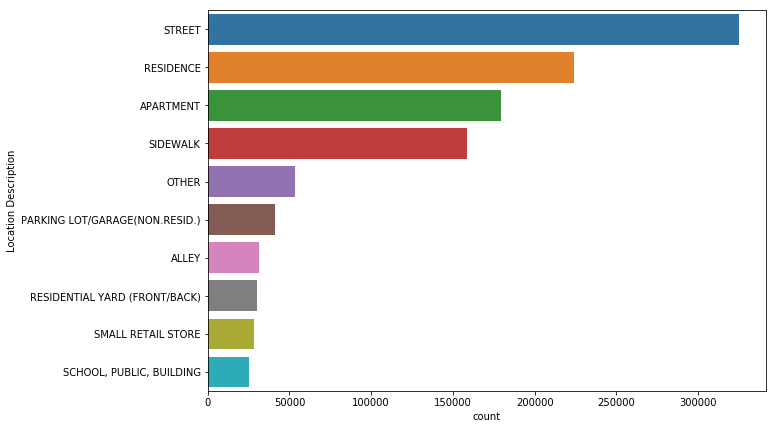

In [58]:
plt.figure(figsize = (10, 7))
sns.countplot(y= 'Location Description', data = df_crime, order = df_crime['Location Description'].value_counts().iloc[:10].index)

In [59]:
pd.value_counts(df_crime['Primary Type'])[:10]

THEFT                  321950
BATTERY                258941
CRIMINAL DAMAGE        152812
NARCOTICS              131177
ASSAULT                 89508
OTHER OFFENSE           85361
BURGLARY                81668
DECEPTIVE PRACTICE      67609
MOTOR VEHICLE THEFT     59856
ROBBERY                 56092
Name: Primary Type, dtype: int64

In [60]:
pd.value_counts(df_crime['Primary Type']).count()

33

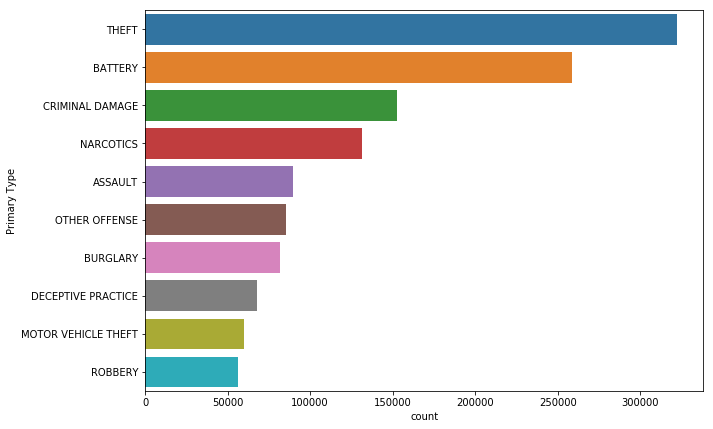

In [61]:
plt.figure(figsize = (10, 7))
sns.countplot(y= 'Primary Type', data = df_crime, order = df_crime['Primary Type'].value_counts().iloc[:10].index)

In [62]:
chi_data.rename(columns={'Number':'Community Area'}, inplace=True)
chi_data.head()

,Community Area,Neighborhood,Neighborhoods,Latitude,Longitude
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589


In [63]:
df_crime['Community Area'] = df_crime['Community Area'].astype(int)
df_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [64]:
crime_data = []
crime_data = df_crime.join(chi_data[['Community Area', 'Neighborhood']].set_index('Community Area'), on = 'Community Area')
crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Neighborhood
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",North Lawndale
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Woodlawn
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Austin
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Austin
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Austin


In [65]:
notsafe_area = []
notsafe_area = pd.value_counts(crime_data['Neighborhood']).head(5)
df_notsafe_area = pd.DataFrame({"Community Area" : notsafe_area.index, "Value Count":notsafe_area})
df_notsafe_area.index = range(len(notsafe_area))
df_notsafe_area.head()

,Community Area,Value Count
0,Austin,92679
1,Near North Side,48751
2,South Shore,47731
3,Humboldt Park,45943
4,North Lawndale,44819


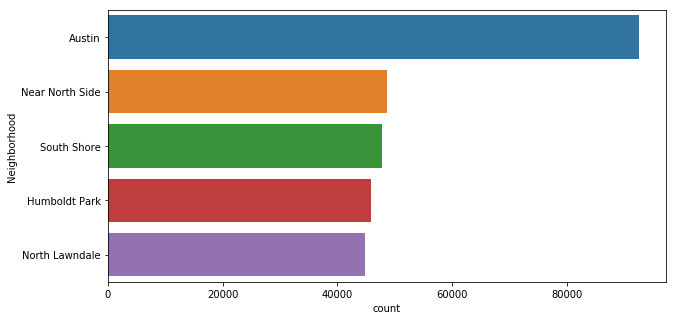

In [66]:
plt.figure(figsize = (10, 5))
sns.countplot(y= 'Neighborhood', data = crime_data, order = crime_data['Neighborhood'].value_counts().sort_values(ascending=False).iloc[:5].index)

In [67]:
safe_area = []
safe_area = pd.value_counts(crime_data['Neighborhood']).tail(5)
df_safe_area = pd.DataFrame({"Community Area" : safe_area.index, "Value Count":safe_area})
df_safe_area.index = range(len(safe_area))
df_safe_area.head()

,Community Area,Value Count
0,Hegewisch,3109
1,Montclare,3109
2,Forest Glen,2454
3,Burnside,2144
4,Edison Park,1385


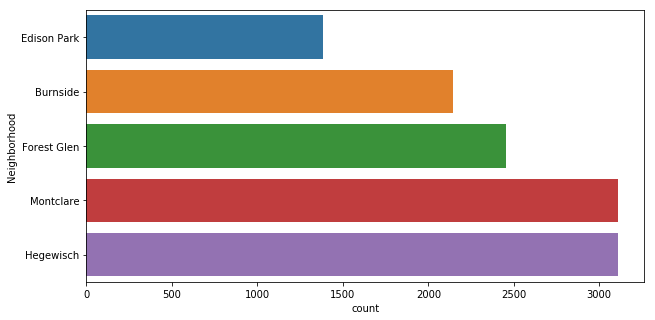

In [68]:
plt.figure(figsize = (10, 5))
sns.countplot(y= 'Neighborhood', data = crime_data, order = crime_data['Neighborhood'].value_counts().sort_values(ascending=True).iloc[:5].index)

In [69]:
unique_locations = crime_data['Location'].value_counts()
unique_locations.head()

(41.883500187, -87.627876698)    2093
(41.754592961, -87.741528537)    2082
(41.979006297, -87.906463155)    1338
(41.897895128, -87.624096605)    1319
(41.742710224, -87.634088181)    1122
Name: Location, dtype: int64

In [70]:
CR_index = pd.DataFrame({"Raw_String" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Raw_String,ValueCount
0,"(41.883500187, -87.627876698)",2093
1,"(41.754592961, -87.741528537)",2082
2,"(41.979006297, -87.906463155)",1338
3,"(41.897895128, -87.624096605)",1319
4,"(41.742710224, -87.634088181)",1122


In [71]:
def Location_extractor(Raw_Str):
    preProcess = Raw_Str[1:-1].split(',')
    lat =  float(preProcess[0])
    long = float(preProcess[1])
    return (lat, long)

In [72]:
CR_index['LocationCoord'] = CR_index['Raw_String'].apply(Location_extractor)

In [73]:
CR_index  = CR_index.drop(columns=['Raw_String'], axis = 1)

In [74]:
CR_index.head()

,ValueCount,LocationCoord
0,2093,"(41.883500187, -87.627876698)"
1,2082,"(41.754592961, -87.741528537)"
2,1338,"(41.979006297, -87.906463155)"
3,1319,"(41.897895128, -87.624096605)"
4,1122,"(41.742710224, -87.634088181)"


In [76]:
chicago_map_crime = folium.Map(location=[41.895140898, -87.624255632],
                        zoom_start=10)
for i in range(500):
    lat = CR_index['LocationCoord'].iloc[i][0]
    long = CR_index['LocationCoord'].iloc[i][1]
    radius = CR_index['ValueCount'].iloc[i] / 75
    
    if CR_index['ValueCount'].iloc[i] > 1080:
        color = "#FF4500"
        fil = False    
    else:
        color = None #"#008080"
        fil = None #True
    
    popup_text = """Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(lat,
                               long,
                               CR_index['ValueCount'].iloc[i]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text,radius = radius, color = color, fill = fil).add_to(chicago_map_crime)
    
chicago_map_crime

In [77]:
crime_data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Neighborhood
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",North Lawndale
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Woodlawn
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Austin
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Austin
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Austin


In [78]:
unique_locations = crime_data['Neighborhood'].value_counts()
unique_locations.head()

Austin             92679
Near North Side    48751
South Shore        47731
Humboldt Park      45943
North Lawndale     44819
Name: Neighborhood, dtype: int64

In [79]:
CR_index = pd.DataFrame({"Neighborhood" : unique_locations.index, "ValueCount":unique_locations})
CR_index.index = range(len(unique_locations))
CR_index.head()

,Neighborhood,ValueCount
0,Austin,92679
1,Near North Side,48751
2,South Shore,47731
3,Humboldt Park,45943
4,North Lawndale,44819


In [80]:
chi_data.head()

,Community Area,Neighborhood,Neighborhoods,Latitude,Longitude
1,8,Near North Side,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,32,Loop,Loop;New Eastside;South Loop;West Loop Gate;,41.8786,-87.6251
3,33,Near South Side,Dearborn Park;Printer's Row;South Loop;Prairie...,41.8608,-87.6257
5,5,North Center,Horner Park;Roscoe Village;,41.9467,-87.6883
6,6,Lake View,Boystown;Lake View East;Graceland West;South E...,41.9398,-87.6589


In [81]:
top5_nonsafe = []
top5_nonsafe = CR_index.join(chi_data.set_index('Neighborhood'), on='Neighborhood').sort_values('ValueCount', ascending=False)[:5]
top5_nonsafe

,Neighborhood,ValueCount,Community Area,Neighborhoods,Latitude,Longitude
0,Austin,92679,25,Galewood;The Island;,41.8949,-87.7654
1,Near North Side,48751,8,Cabrini–Green;The Gold Coast;Goose Island;Magn...,41.9039,-87.6315
2,South Shore,47731,43,Jackson Park Highlands;,41.7590,-87.5700
3,Humboldt Park,45943,23,,41.8991,-87.7213
4,North Lawndale,44819,29,Lawndale;Homan Square;Douglas Park;,41.8590,-87.7152


In [82]:
# create map of Chicago using latitude and longitude values
top5_nonsafe_area = folium.Map(location=[41.895140898, -87.624255632],zoom_start=10)

# add markers to map
for lat, lng, name, ValueCount in zip(top5_nonsafe['Latitude'], top5_nonsafe['Longitude'], top5_nonsafe['Neighborhood'], top5_nonsafe['ValueCount']):
    rad = (ValueCount/50000) * 10
    popup_text = """Area : {} <br>
                Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(name,lat,long,ValueCount)
    folium.CircleMarker([lat, lng],popup=popup_text, color='red',radius = rad, fill=True).add_to(top5_nonsafe_area)
top5_nonsafe_area

In [83]:
top5_safe = []
top5_safe = CR_index.join(chi_data.set_index('Neighborhood'), on='Neighborhood').sort_values('ValueCount', ascending=True)[:5]
top5_safe

,Neighborhood,ValueCount,Community Area,Neighborhoods,Latitude,Longitude
76,Edison Park,1385,9,Edison Park;,42.0035,-87.8171
75,Burnside,2144,47,,41.7281,-87.5964
74,Forest Glen,2454,12,Edgebrook;Old Edgebrook;South Edgebrook;Saugan...,41.9962,-87.7642
73,Montclare,3109,18,Montclare;,41.9294,-87.7982
72,Hegewisch,3109,55,,41.6555,-87.5459


In [84]:
# create map of Chicago using latitude and longitude values
top5_safe_area = folium.Map(location=[41.895140898, -87.624255632],zoom_start=10)

# add markers to map
for lat, lng, name, ValueCount in zip(top5_safe['Latitude'], top5_safe['Longitude'], top5_safe['Neighborhood'], top5_safe['ValueCount']):
    rad = (ValueCount/2000) * 10
    popup_text = """Area : {} <br>
                Latitude : {}<br>
                Longitude : {}<br>
                Criminal Incidents : {}<br>"""
    popup_text = popup_text.format(name,lat,long,ValueCount)
    folium.CircleMarker([lat, lng],popup=popup_text, color='green',radius = rad, fill=True).add_to(top5_safe_area)
top5_safe_area

In [99]:
crimes = []
crimes = crime_data
crimes = crimes.iloc[:, 3: ]
crimes.index = pd.to_datetime(crimes.index)
crimes.Date = pd.to_datetime(crimes.Date, format = '%m/%d/%Y %I:%M:%S %p')
crimes.index = pd.DatetimeIndex(crimes.Date)
crimes.head()

,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Neighborhood
Date,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",North Lawndale
2016-05-03 21:40:00,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",Woodlawn
2016-05-03 23:31:00,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",Austin
2016-05-03 22:10:00,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",Austin
2016-05-03 22:00:00,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",Austin


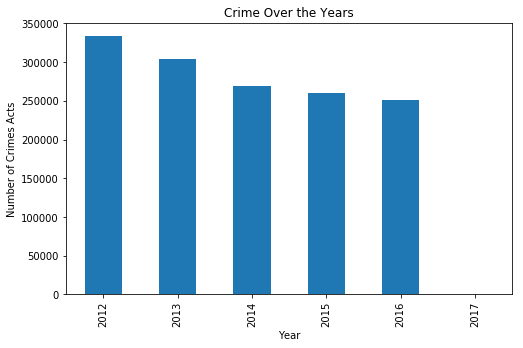

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

In [101]:
plt.figure(figsize = (8,5))
crimes.groupby([crimes.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()

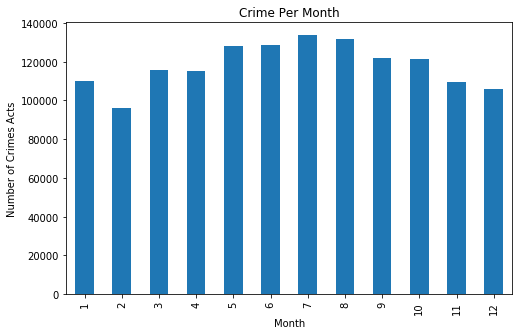

In [103]:
plt.figure(figsize = (8,5))
crimes.groupby([crimes.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [104]:
crimes.shape

(1418365, 21)

In [111]:
crimes = crimes[crimes.Arrest==True]  # converted dataset into arrest dataset 
crimes.shape

(371057, 21)

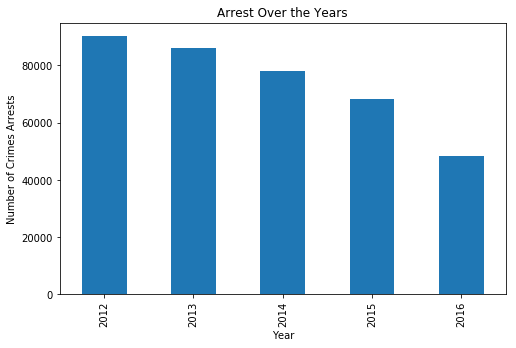

In [112]:
plt.figure(figsize = (8,5))
crimes.groupby([crimes.index.year]).size().plot.bar()
plt.title('Arrest Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Arrests')
plt.show()

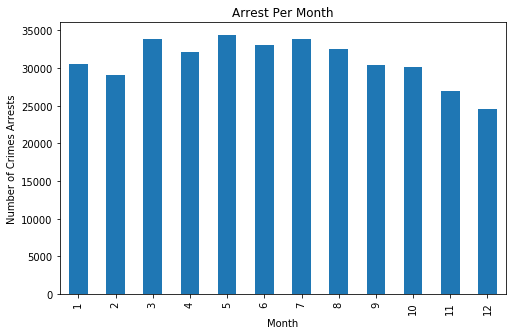

In [113]:
plt.figure(figsize = (8,5))
crimes.groupby([crimes.index.month]).size().plot.bar()
plt.title('Arrest Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Arrests')
plt.show()

### Conclusion:
<br>
(1) Overview of 77 community area in Chicago and plot on map <br>
(2) In loop area top 5 venues found<br>
(3) In each community area top 10 venues found and areas are clustered as per venue liking.<br>
(4) Chicago crime data analysis and top 5 safe and top 5 not safe community areas. Additional findings are: <br>
        4.1) Crimes rate has be decreased.<br>
        4.2) Crimes rate, on given year, is more during summer time.<br>
